#1 Initialization

Connect a Google Drive Account

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the dataset and setup matplotlib

In [ ]:
import os
home = '/content/drive/My Drive/SDA'
os.chdir(home)
import warnings
warnings.filterwarnings("ignore");
import matplotlib.pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
import pandas as pd
data = pd.read_csv("dataset_colab.csv",delimiter=',', index_col=0)

N = len(data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import multivariate_normal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore");

Data Normalization


In [ ]:
sc = StandardScaler()

# get numeric data
num_d = data.select_dtypes(exclude=['object'])

# update the cols with their normalized values
data[num_d.columns] = sc.fit_transform(num_d)

# convert string variable to One Hot Encoding
data = pd.get_dummies(data)

features = [data.columns[i] for i in range(len(data.columns))]

#2 Data Analysis

#2.1.1 Classes Distribution


In [ ]:
categories = ["weight_category_Insufficient_Weight","weight_category_Normal_Weight","weight_category_Obesity_Type_I","weight_category_Obesity_Type_II","weight_category_Obesity_Type_III","weight_category_Overweight_Level_I","weight_category_Overweight_Level_II"]


In [ ]:
for category in categories:
    print(f'{category}: {data[category].value_counts()[1] / N * 100: .2f}%')



weight_category_Insufficient_Weight:  12.88%
weight_category_Normal_Weight:  13.60%
weight_category_Obesity_Type_I:  16.63%
weight_category_Obesity_Type_II:  14.07%
weight_category_Obesity_Type_III:  15.35%
weight_category_Overweight_Level_I:  13.74%
weight_category_Overweight_Level_II:  13.74%


In [ ]:
n=[None]*2
for value in [0,1]:
  n[value]=data[category].value_counts()[value]

print(n)

[1821, 290]


#2.1.2 Mean and Variance of Height and Weight

In [ ]:
#We select Height and Weight for classification

feature_1 = 'Height'
feature_2 = 'Weight'


f1_values=[None]*2
f2_values=[None]*2

mean = {
    feature_1: [None]*2,
    feature_2: [None]*2,
}
var = {
    feature_1: [None]*2,
    feature_2: [None]*2,
}

mean_vector={category:[None]*2 for category in categories}
var_vector={category:[None]*2 for category in categories}
for category in categories:
  for value in [0,1]:
    #selecting all rows with the response variable True or False
    Index = data[category]==value

    f1_values[value] = data[Index][feature_1]
    f2_values[value] = data[Index][feature_2]


    # computing mean and variance of the selected features (f1 and f2)
    mean[feature_1][value] = f1_values[value].mean()
    var[feature_1][value] = f1_values[value].var()
    mean[feature_2][value] = f2_values[value].mean()
    var[feature_2][value] = f2_values[value].var()

  mean_vector[category][0] = mean[feature_1]
  var_vector[category][0] = var[feature_1]
  mean_vector[category][1] = mean[feature_2]
  var_vector[category][1] = var[feature_2]


In [ ]:
print(mean_vector)
print(var_vector)

{'weight_category_Insufficient_Weight': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]], 'weight_category_Normal_Weight': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]], 'weight_category_Obesity_Type_I': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]], 'weight_category_Obesity_Type_II': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]], 'weight_category_Obesity_Type_III': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]], 'weight_category_Overweight_Level_I': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]], 'weight_category_Overweight_Level_II': [[-0.0035344922127506255, 0.022194173515233194], [0.027373130550106362, -0.17188438183361063]]}
{'weight_category_Insufficient_Weight': [[1.01381919010772, 0.91931998729

#2.1.3 Covariance matrix

In [ ]:
data[features].cov()

,Age,Height,Weight,eats_veggies,num_meals,drinks_water,exercises_often,time_using_tech,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,eats_high_calor_food_no,eats_high_calor_food_yes,eats_snacks_Always,eats_snacks_Frequently,eats_snacks_Sometimes,eats_snacks_no,SMOKE_no,SMOKE_yes,counts_calories_no,counts_calories_yes,drinks_alcohol_Always,drinks_alcohol_Frequently,drinks_alcohol_Sometimes,drinks_alcohol_no,method_trans_Automobile,method_trans_Bike,method_trans_Motorbike,method_trans_Public_Transportation,method_trans_Walking,weight_category_Insufficient_Weight,weight_category_Normal_Weight,weight_category_Obesity_Type_I,weight_category_Obesity_Type_II,weight_category_Obesity_Type_III,weight_category_Overweight_Level_I,weight_category_Overweight_Level_II
Age,1.000474,-0.025970,0.202656,0.016299,-0.043965,-0.045325,-0.145007,-0.297071,-0.024207,0.024207,-0.079480,0.079480,-0.020477,0.020477,-0.004898,-0.038941,0.053332,-0.009493,-0.013147,0.013147,0.024239,-0.024239,-0.000247,0.014791,-0.005901,-0.008643,0.249156,0.000210,0.001461,-0.240688,-0.010139,-0.092030,-0.055182,0.041226,0.086995,-0.019775,-0.019387,0.058152
Height,-0.025970,1.000474,0.463356,-0.038139,0.243787,0.213477,0.294849,0.051936,-0.309358,0.309358,-0.095690,0.095690,-0.057156,0.057156,0.000717,-0.039002,0.052975,-0.014690,-0.007932,0.007932,0.027880,-0.027880,-0.000009,0.008154,0.050610,-0.058755,0.032078,0.001668,-0.000754,-0.038932,0.005941,-0.014593,-0.036588,-0.014041,0.105804,-0.023240,-0.020393,0.003050
Weight,0.202656,0.463356,1.000474,0.216227,0.107520,0.200670,-0.051461,-0.071595,-0.080866,0.080866,-0.191941,0.191941,-0.087258,0.087258,-0.014864,-0.121330,0.152517,-0.016323,-0.003680,0.003680,0.042086,-0.042086,-0.000391,-0.007484,0.122707,-0.114832,-0.005612,-0.001251,-0.002687,0.025756,-0.016207,-0.180576,-0.126908,0.039923,0.154381,0.201466,-0.064662,-0.023624
eats_veggies,0.016299,-0.038139,0.216227,1.000474,0.042236,0.068494,0.019949,-0.101183,0.137308,-0.137308,-0.015597,0.015597,0.008743,-0.008743,-0.002849,0.015359,0.003451,-0.015961,-0.002047,0.002047,-0.014977,0.014977,-0.000372,-0.003342,0.039140,-0.035426,-0.025155,-0.001716,-0.000541,0.025163,0.002249,0.014911,-0.021544,-0.072609,-0.007320,0.167120,-0.039757,-0.040801
num_meals,-0.043965,0.243787,0.107520,0.042236,1.000474,0.057115,0.129566,0.036343,-0.033814,0.033814,-0.027573,0.027573,0.002243,-0.002243,0.004059,0.015239,0.003180,-0.022478,-0.001116,0.001116,0.003257,-0.003257,-0.001027,-0.003426,0.046928,-0.042474,0.022013,0.001341,0.000279,-0.024678,0.001045,0.037914,0.009276,-0.054270,0.010663,0.062059,-0.032054,-0.033589
drinks_water,-0.045325,0.213477,0.200670,0.068494,0.057115,1.000474,0.167316,0.011971,-0.053987,0.053987,-0.056960,0.056960,-0.003114,0.003114,0.000445,-0.044416,0.019545,0.024426,0.004573,-0.004573,-0.001675,0.001675,-0.000006,0.008857,0.029425,-0.038276,-0.019051,0.001503,-0.000068,0.016281,0.001336,-0.028763,-0.035034,0.028288,-0.029941,0.050236,0.011374,0.003840
exercises_often,-0.145007,0.294849,-0.051461,0.019949,0.129566,0.167316,1.000474,0.058590,-0.094842,0.094842,0.021895,-0.021895,0.034607,-0.034607,0.003597,0.010650,-0.017979,0.003733,-0.001603,0.001603,-0.015471,0.015471,-0.000006,0.009806,-0.064350,0.054550,0.000967,0.003861,-0.001178,-0.021163,0.017513,0.036356,0.037922,-0.004607,-0.006363,-0.062383,0.007515,-0.008441
time_using_tech,-0.297071,0.051936,-0.071595,-0.101183,0.036343,0.011971,0.058590,1.000474,-0.008638,0.008638,-0.008864,0.008864,-0.021924,0.021924,0.003218,-0.000705,0.014519,-0.017031,-0.002517,0.002517,0.002278,-0.002278,0.001045,0.010921,-0.048625,0.036659,-0.068033,-0.001250,-0.004855,0.062336,0.011802,0.038452,0.004042,0.005158,-0.032989,-0.013430,-0.010131,0.008897
Gender_Female,-0.024207,-0.309358,-0.080866,0.137308,-0.033814,-0.053987,-0.094842,-0.008638,0.250083,-0.250083,0.019801,-0.019801,0.010403,-0.010403,-0.001510,0.019636,-0.013293,-0.004833,0.003194,-0.003194,-0.010696,0.010

#2.1.4 synthetic dataset generation

In [ ]:
#Producing a synthetic dataset for weight_category_Obesity_Type_II

output_feature=categories[3]
import numpy as np
from sklearn.utils import shuffle

f1_name="Height"
f2_name="Weight"

X = [None]*2
Y = [None]*2

m = [None]*2
c = [None]*2
v = [None]*2

n_samples = [None]*2

# For satisfied and neutral or dissatisfied clients we calculate the mean and 
# the variance, in order to get a syntetic distribution and get a general idea
# of the data distribution. We are assuming that the distribution is a 
# normal multivariate.
for value in [0,1]:
    n_samples[value] = n[value]
    index = data[output_feature] == value
    covariance = data[index][f1_name].cov(data[index][f2_name])
    m[value] = [mean[f1_name][value], mean[f2_name][value]]
    c[value] = [[var[f1_name][value], covariance],
              [covariance, var[f2_name][value]]]
    v[value] = [var[f1_name][value], var[f2_name][value]]

    X[value] = np.random.multivariate_normal(m[value], c[value], n_samples[value])
    Y[value] = np.ones((n_samples[value], 1)) * value

# merging and shuffling the generated dataset
XX = np.vstack((X[0], X[1]))
YY = np.vstack((Y[0], Y[1]))
XX, YY = shuffle(XX, YY)

#Naive-Bayes


In [ ]:
#create a contourplot
def my_plot(mean, cov, color):
  #Get grid boundaries
  ax=plt.gca(); xlim=ax.get_xlim(); ylim=ax.get_ylim();
  #Create the grid
  xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30) ) 
  #Stack grid
  xx_yy=np.dstack((xx,yy))
  #Build the plot (multivariate normal)
  rv = multivariate_normal(mean, cov)
  #Draw filled contours
  ax.contourf(xx,yy, rv.pdf(xx_yy), colors=color, alpha=0.5, levels=[0.01, 0.9])

Classificatore Naive-Bayes suppone che le feature siano tutte indipendenti:
P(Y|X1,...,Xn)=P(X1,.....,Xn|Y)*P(Y)/P(X1,....Xn) --- Y={0,1}
P(X1,...,Xn|Y)=P(X1|Y)*P(X2|Y)*...*P(Xn|Y)

Generiamo una gaussiana bivariata (2 features)

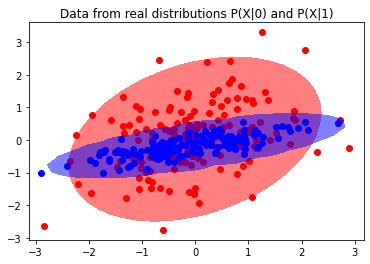

In [ ]:
#Generate P(X|0)


#Generate samples from this distribution
XX_0 = np.random.multivariate_normal(m[0], c[0], 150);

#Generate P(X|1)

#Generate samples from this distribution
XX_1 = np.random.multivariate_normal(m[1], c[1], 150);

#plot generated data
plt.figure(); plt.title("Data from real distributions P(X|0) and P(X|1)")
plt.scatter(XX_0[:,0], XX_0[:,1], color='r'); 


my_plot(m[0], c[0], 'r' )

plt.scatter(XX_1[:,0], XX_1[:,1], color='b'); 

my_plot(m[1],c[1],'b')
plt.show()




In [ ]:
#NB Classifier

YY_0 = np.zeros((150,1)); YY_1 = np.ones((150,1));

#Data Merging

XX = np.vstack((XX_0, XX_1)); YY = np.vstack((YY_0,YY_1));

#Data Split train/test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX,YY,test_size=0.5)

##Classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
YY_estimated = gnb.fit(XX_train, YY_train).predict(XX_test)

#Evaluate results
print("confusion matrix:")
print(confusion_matrix(YY_test, YY_estimated))
print("\nClassifier Perfomance Metrics")
print(classification_report(YY_test, YY_estimated))

confusion matrix:
[[48 23]
 [ 9 70]]

Classifier Perfomance Metrics
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75        71
         1.0       0.75      0.89      0.81        79

    accuracy                           0.79       150
   macro avg       0.80      0.78      0.78       150
weighted avg       0.80      0.79      0.78       150



In [ ]:
##Real data

XX_real = data[features[1:3]].to_numpy()
YY_real = data[categories[3]].to_numpy()

#Data Split train/test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX_real,YY_real,test_size=0.5)

##Classification
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
YY_estimated = gnb.fit(XX_train, YY_train).predict(XX_test)

#Evaluate results
print("confusion matrix:")
print(confusion_matrix(YY_test, YY_estimated))
print("\nClassifier Perfomance Metrics")
print(classification_report(YY_test, YY_estimated))

confusion matrix:
[[867  27]
 [ 32 130]]

Classifier Perfomance Metrics
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       894
           1       0.83      0.80      0.82       162

    accuracy                           0.94      1056
   macro avg       0.90      0.89      0.89      1056
weighted avg       0.94      0.94      0.94      1056



#Logistic Regression


P(Y|X)=Sigmoid

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
def my_lr(XX_train, XX_test, YY_train, YY_test, plot_flag, results_flag):
  lr = SGDClassifier('log')
  
  #Model fitting
  lr.fit(XX_train, YY_train)

  #Predict class labels for sample in X
  YY_estimated = lr.predict(XX_test)

  if plot_flag:
    f = plt.figure()
    plt.scatter(XX_train[:,0], XX_train[:,1], c=YY_train, cmap='RdBu')
    

    #Get grid boundaries
    ax=plt.gca(); xlim=ax.get_xlim(); ylim=ax.get_ylim();
    #Create the grid
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30) ) 
    #Stack grid
    xx_yy=np.vstack([xx.ravel(),yy.ravel()]).T
    pp = lr.predict_proba(xx_yy)[:,1].reshape(xx.shape)
    #Draw filled contours
    contour = ax.contourf(xx,yy, pp, alpha=0.5)
    f.colorbar(contour)

  if results_flag:
    #Evaluate results
    print("confusion matrix:")
    print(confusion_matrix(YY_test, YY_estimated))
    print("\nClassifier Perfomance Metrics")
    print(classification_report(YY_test, YY_estimated))


In [ ]:
#Logistic "Regression"
XX_real = data[features[:-7]].to_numpy()
YY_real = data[categories[3]].to_numpy()

#Data split train test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX_real,YY_real,test_size=0.5)

#Classification
my_lr(XX_train, XX_test, YY_train, YY_test, False, True)

confusion matrix:
[[904   2]
 [  4 146]]

Classifier Perfomance Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       906
           1       0.99      0.97      0.98       150

    accuracy                           0.99      1056
   macro avg       0.99      0.99      0.99      1056
weighted avg       0.99      0.99      0.99      1056



confusion matrix:
[[70  3]
 [77  0]]

Classifier Perfomance Metrics
              precision    recall  f1-score   support

         0.0       0.48      0.96      0.64        73
         1.0       0.00      0.00      0.00        77

    accuracy                           0.47       150
   macro avg       0.24      0.48      0.32       150
weighted avg       0.23      0.47      0.31       150



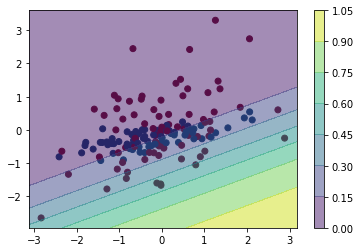

In [ ]:
#Logistic "Regression" ì

#Data split train test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX,YY, test_size=0.5)

#Classification
my_lr(XX_train, XX_test, YY_train, YY_test, True, True)

confusion matrix:
[[838  70]
 [ 92  56]]

Classifier Perfomance Metrics
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       908
           1       0.44      0.38      0.41       148

    accuracy                           0.85      1056
   macro avg       0.67      0.65      0.66      1056
weighted avg       0.84      0.85      0.84      1056



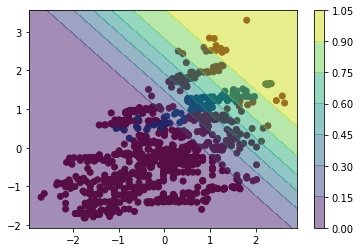

In [ ]:
#Logistic "Regression" on (roughly) linear separable data
XX_real = data[features[1:3]].to_numpy()
YY_real = data[categories[3]].to_numpy()

#Data split train test
XX_train, XX_test, YY_train, YY_test = train_test_split(XX_real,YY_real,test_size=0.5)

#Classification
my_lr(XX_train, XX_test, YY_train, YY_test, True, True)